<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/24_4_HW_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Обработка аудиосигналов](https://colab.research.google.com/drive/13r2TM72wK5mFSMsb1rBV4gspNCqkzJDY)
2. [Распознавание музыкального жанра](https://colab.research.google.com/drive/1VVV3EUT9uaVHNwZBweAsfOcDYwtPMJ2z)
3. Генерация музыкальных произведений с помощью НС
4. [Домашняя работа](https://colab.research.google.com/drive/1uZ-sCic9BV5quOohckycIqhYkl8MvvvV)

В данной части урока мы продемонстрируем как с помощью базы данных классической музыки и простейшей LSTM-сети создать нейронную сеть способную "сочинять" классическую музыку.

Для начала опишем простой алгоритм, который вы можете использовать для обучения своих моделей, изменив лишь датасет с исходными музыкальными файлами.

Создание нейросети, способной генерировать музыку, требует знаний в области глубокого обучения и обработки звука, а также доступа к вычислительным ресурсам. Рассмотрим общий шаг за шагом процесс создания такой нейросети:

1. **Выбор задачи и данных**: Решите, какой вид музыки вы хотите создавать (например, классическая, джаз, рок) и соберите набор данных, соответствующий вашей задаче. Этот набор данных должен содержать аудиозаписи ваших желаемых стилей музыки.

2. **Предобработка данных**: Аудиозаписи требуют предварительной обработки. Это включает в себя извлечение аудиофункций, таких как спектрограммы или мел-частотные кепстральные коэффициенты (MFCC), а также разбиение аудиозаписей на короткие фрагменты, называемые окнами.

3. **Архитектура модели**: Выберите архитектуру нейронной сети для генерации музыки. Один из популярных подходов - использовать рекуррентные нейронные сети (RNN) или вариации, такие как LSTM или GRU, которые способны учитывать последовательность данных. Для обработки аудио также можно использовать сверточные нейронные сети (CNN).

4. **Обучение модели**: Обучите вашу нейронную сеть на подготовленных данных. Важно иметь множество вычислительных ресурсов, чтобы справиться с вычислительно интенсивной задачей обучения.

5. **Функция потерь и метрики**: Определите функцию потерь (loss function) для оценки качества генерируемой музыки и выберите метрики для оценки производительности модели.

6. **Генерация музыки**: После обучения модели можно использовать ее для генерации музыки. Это можно сделать, предсказывая следующий звуковой фрагмент на основе предыдущих.

7. **Оценка и настройка**: Оцените результаты генерации музыки и, при необходимости, настройте модель и повторите процесс обучения.

8. **Использование модели**: После достижения удовлетворительных результатов вы можете использовать вашу модель для генерации музыки в соответствии с вашими потребностями.

Обратите внимание, что создание нейросети для генерации музыки - это сложная задача, требующая знаний в области машинного обучения и звуковой обработки, а также доступа к мощным вычислительным ресурсам. Большинство успешных проектов в этой области требуют нескольких месяцев или даже лет разработки и оптимизации модели. Но можно учиться и на готовых примерах!


## Импорт библиотек

Для работы с midi-файлами мы будем использовать `Open Source` библиотеку `music21`. В рамках урока мы познакомимся только поверхностно с библиотекой. Для более глубоко погружения рекомендуем ознакомиться с [документацией](https://www.music21.org/music21docs/index.html). Для полноценной работы с библиотекой необходимо установить целый ряд зависимостей.

In [11]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
!pip install --upgrade music21


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [2]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

In [12]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [14]:
from music21 import *

# настраиваем окружение в соответствии с документацией
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

In [13]:
# Импортируем библиотеки
import tensorflow
import os
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import fluidsynth

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras.backend as K
from keras.optimizers import Adamax

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

## Загрузка данных

Набор данных содержит 337 классических фортепианных пьес 25 композиторов + 1 рождественскую песню. Общая длительность всех произведений 23,17 часа.

Датасет собран из MIDI файлов с сайта [Classical Piano MIDI](http://www.piano-midi.de/).



In [15]:
!wget https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip

--2025-01-07 11:06:48--  https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2751606 (2.6M) [application/x-zip-compressed]
Saving to: ‘classical-music-midi.zip.1’

classical-music-mid 100%[===================>]   2.62M  2.66MB/s    in 1.0s    

2025-01-07 11:06:50 (2.66 MB/s) - ‘classical-music-midi.zip.1’ saved [2751606/2751606]



In [6]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "classical-music-midi" -d ./dataset

In [7]:
!dir ./dataset

Albeniz    Borodin	Christmas  Granados  Mendelssohn  Rachmaninoff	Sinding
Bach	   Brahms	Clementi   Grieg     Moszkowski   Ravel		Tchaikovsky
Balakirev  Burgmueller	Debussy    Haydn     Mozart	  Schubert
Beethoven  Chopin	Godowsky   Liszt     Mussorgsky   Schumann


In [8]:
CLASS_LIST=["Bach", "Beethoven", "Tchaikovsky"]
CLASS_LIST_HW = ["Chopin"]
CLASS_LIST_CTR = ["Mozart"]

In [9]:
def get_all_midi(class_list):
    all_midis = []
    for compositor in class_list:
        filepath = f"./dataset/{compositor}/"
        for i in os.listdir(filepath):
            if i.endswith(".mid"):
                tr = filepath + i

                # чтение и парсинг midi-файлов в Stream-объект библиотеки music21
                midi = converter.parse(tr)
                all_midis.append(midi)
    return all_midis


In [10]:
all_midis = get_all_midi(CLASS_LIST_HW)
print("Общее количество midi-файлов:", len(all_midis))

Общее количество midi-файлов: 48


In [16]:
starters = get_all_midi(CLASS_LIST_CTR)
print("Общее количество midi-файлов:", len(starters))

Общее количество midi-файлов: 21


**Ноты** (Note): Музыкальные ноты являются строительными блоками музыки. Они определяют высоту звука, связанны с определенной звуковой вибрацией.

**Аккорд** (Chord): Группа нот, которые хорошо звучат вместе, называется аккордом.

Список из `all_midis` состоит из объектов `Stream` библиотеки `music21`, который содержит - как аккорды, так и ноты, мы будем извлекать их в виде нот и получать последовательность нот в музыкальной композиции.

Функция для получения нот:

Теперь в списке `all_midis` содержаться все midi-файлы.

Объявим функцию для преобразования потока Stream midi-файлов в список нот, а точнее их тональностей (тонов).

In [17]:
def getNotes(file):
    notes = []
    notes_to_parse = None
    for j in file:

        # получение инструментов из Stream-объекта
        songs = instrument.partitionByInstrument(j)

        # цикл по всем инструментам
        for part in songs.parts:
            # используем рекурсивный итератор в соответствии с документацией
            notes_to_parse = part.recurse()
            # части Stream-объекта, с которым мы работает состоит из разных элементов
            # отберем только интересующие нас элементы note.Note (нота) и chord.Chord (целый аккорд, последовательность нот)
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    # извлекаем ноту как тон (терминология библиотеки)
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    # аккорд функционирует как объект-нота, но имеет несколько последовательных тонов
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes

Большие массивы данных, объединенные схожей тематикой принято называть корпусами. Мы также поступим и назовем `Corpus` наш список всех нот из всех файлов датасета.

In [35]:
Corpus = getNotes(all_midis)
print("Число midi файлов", len(all_midis))
print("Всего нот во всех midi-файлах всего датасета:", len(Corpus))
print("Первые 50 нот в корпусе:", Corpus[:50])

Corpus_starters = getNotes(starters)
print("Число midi файлов", len(starters))
print("Всего нот во всех midi-файлах всего датасета:", len(Corpus_starters))
print("Первые 50 нот в корпусе:", Corpus_starters[:50])

Число midi файлов 48
Всего нот во всех midi-файлах всего датасета: 57894
Первые 50 нот в корпусе: ['11.3.4', '3.8', '11.4', '8', 'F4', '11.3.5', '3', 'F#4', '11.3.6', '3.8', 'G4', '3.7.11', '8', 'G#4', '8.11.3', '3', 'A4', '3.9', '8.11.3', 'B-4', '10.3', '8', 'B4', '8.11.3', '3', 'C5', '8.0.3', '8.11.3', 'C#5', '1.3.8', '8', 'D5', '2.3.8', '3', 'E-5', '10.3', '10.3', 'E5', '4.10', '3.7', 'E-5', '10.3', '10.3', 'C#5', '1.3.8', '3.8', 'B4', '8.11.3', '11.3', 'C#5']
Число midi файлов 21
Всего нот во всех midi-файлах всего датасета: 55802
Первые 50 нот в корпусе: ['F4', 'F3', 'A3', 'C4', 'A3', 'A4', 'C4', 'A3', 'C5', 'F3', 'C4', 'E-4', 'C4', 'A4', 'E-4', 'C4', 'B-4', 'F3', 'B-3', 'D4', 'B-3', 'G5', 'D4', 'B-3', 'F5', 'F3', 'E5', 'G3', 'E5', 'B-3', 'G3', 'B-3', 'G3', 'F5', '5.9', 'A4', 'D5', 'G4', 'C5', 'A4', 'F4', 'F3', 'A2', 'D3', 'G4', 'F4', 'G2', '4.5', 'C3', 'E4']


Для тех кто знаком с музыкой эти ноты покажутся знакомыми. А для остальных мы выведем их на нотный стан (в виде картинок ноты видели все) и воспроизведем с помощью плеера (лучше послушать если далек от музыки), чтобы "картинка сложилась".

In [21]:
# Функция преобразования отрывка из корпуса обратно в поток
def chords_n_notes(chunk):
    Melody = []
    offset = 0 # счетчик
    for i in chunk:
        # Если это аккорд разделенный точкой
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") # Разделяем аккорд на части
            notes = []
            for j in chord_notes:
                inst_note=int(j)
                # Преобразуем ноту в обект Note (нота)
                note_chunk = note.Note(inst_note)
                notes.append(note_chunk)
                # объединяем ноты в аккорды
                chord_chunk = chord.Chord(notes)
                # задаем позицию аккорда
                chord_chunk.offset = offset
                Melody.append(chord_chunk)
        # если это нота, а не аккорд
        else:
            # из текстового обозначения ноты делаем объект Note (ноту)
            note_chunk = note.Note(i)
            # задаем позицию ноты
            note_chunk.offset = offset
            Melody.append(note_chunk)
        # увеличиваем номер позиции
        offset += 1
    return Melody

In [23]:
# Преобразуем последовательность из 100 нот обратно в поток Stream
Music = chords_n_notes(Corpus[:100])
Melody_midi = stream.Stream(Music)

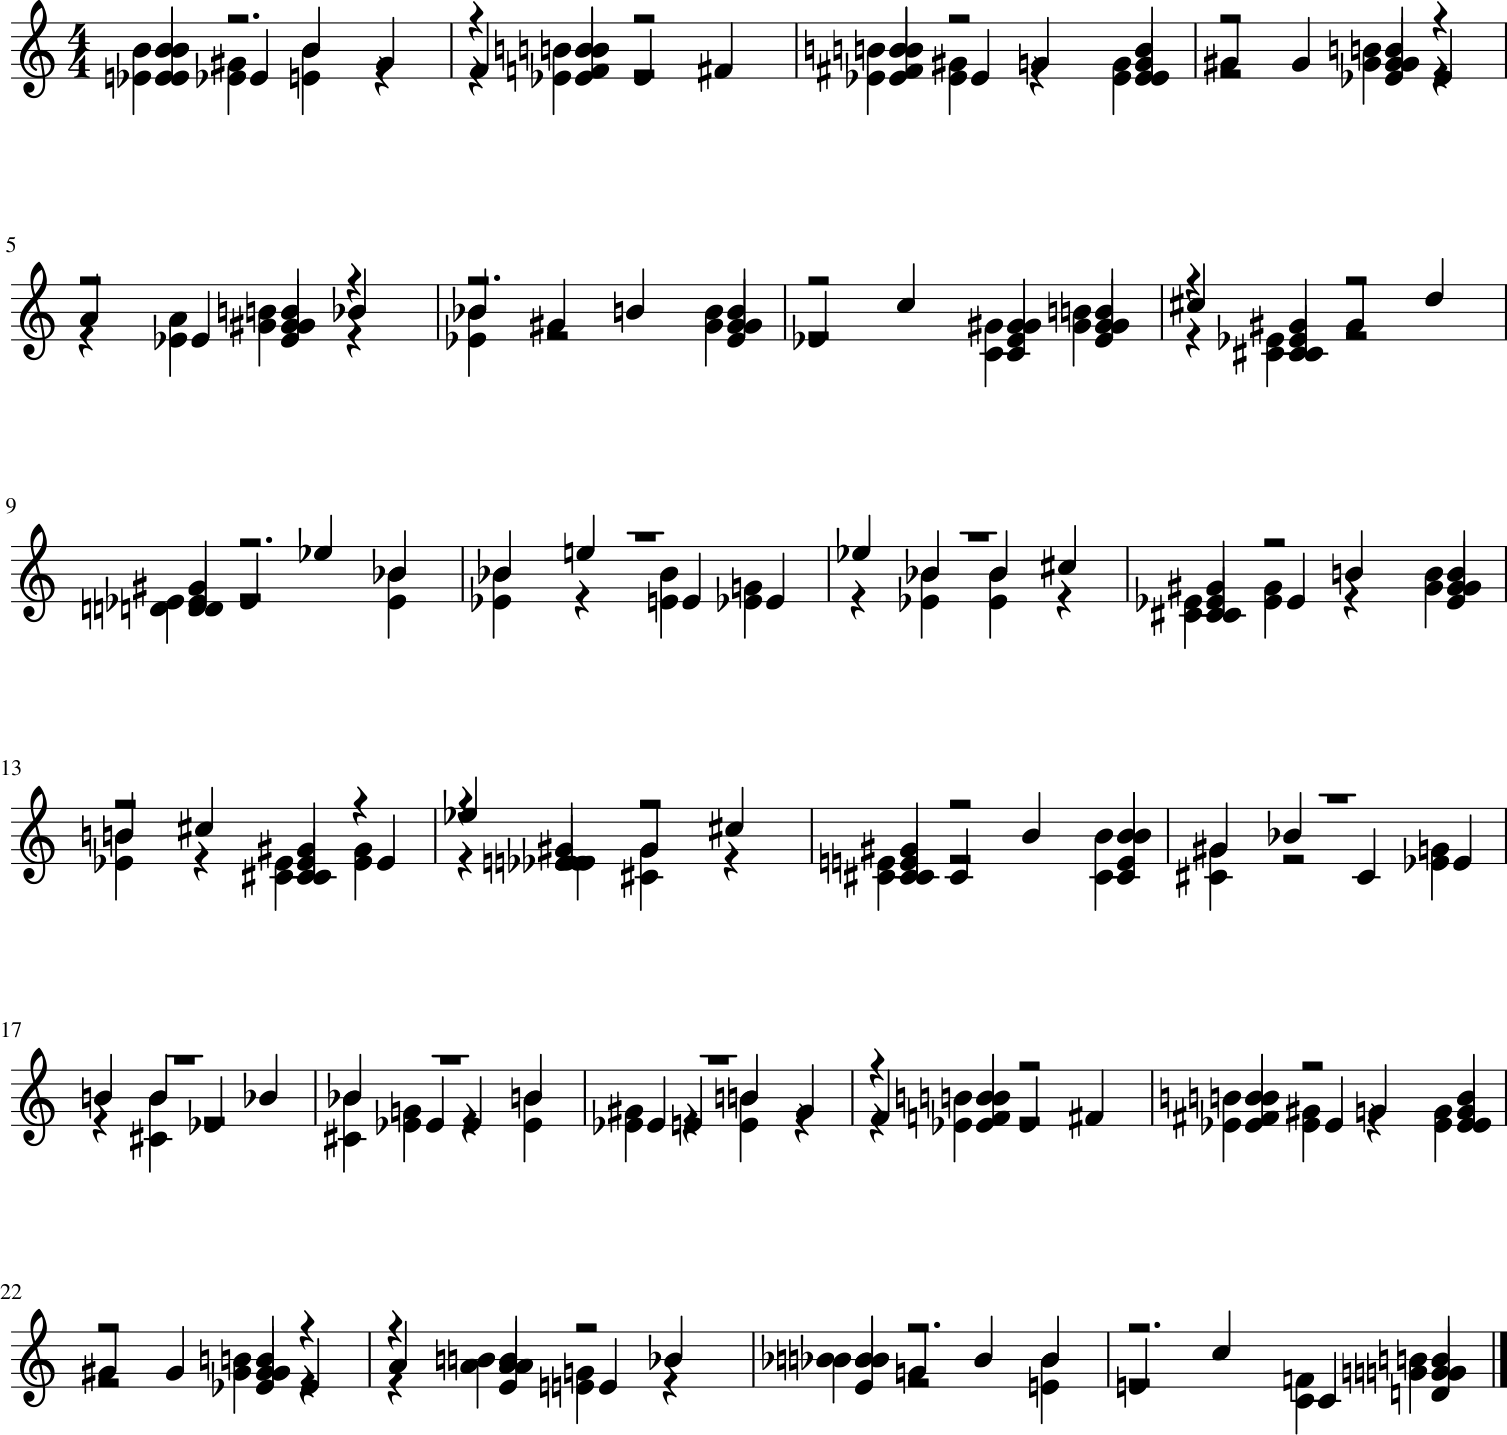

In [24]:
# Отобразим нотный стан
Melody_midi.show()

In [25]:
# Выведем в виде звуковой дорожки
Melody_midi.show('midi')

### Проанализируем ноты в корпусе

**Число уникальных нот в корпусе**

`Counter` - это подкласс словаря `Dict` для подсчета хэшируемых элементов. Иногда его называют пакетом или мультимножеством. Элементы хранятся как ключи словаря, а их количество - как значения словаря.

In [26]:
from collections import Counter
count_num = Counter(Corpus)
print("Общее число уникальных нот в корпусе:", len(count_num))

Общее число уникальных нот в корпусе: 397


**Распределение нот в корпусе**

Очевидно, что в мелодии есть несколько очень редких нот. Некоторые настолько редкие, что за все время звучали только один раз. Их использование создало бы массу проблем. Чтобы избавить от них, необходимо изучить частоту появления нот.

In [27]:
# Ключ в словаре - имена нот
# Значение в словаре - их количество

Notes = list(count_num.keys())
Recurrence = list(count_num.values())

# Средняя частота встречаемости нот в корпусе
def Average(rec):
    return sum(rec) / len(rec)

print('Средняя повторяемость ноты:', Average(Recurrence))
print('Наиболее часто встречаемые ноты:', max(Recurrence), 'раз')
print('Наиболее редкие ноты:', min(Recurrence), 'раз')

Средняя повторяемость ноты: 145.8287153652393
Наиболее часто встречаемые ноты: 1627 раз
Наиболее редкие ноты: 1 раз


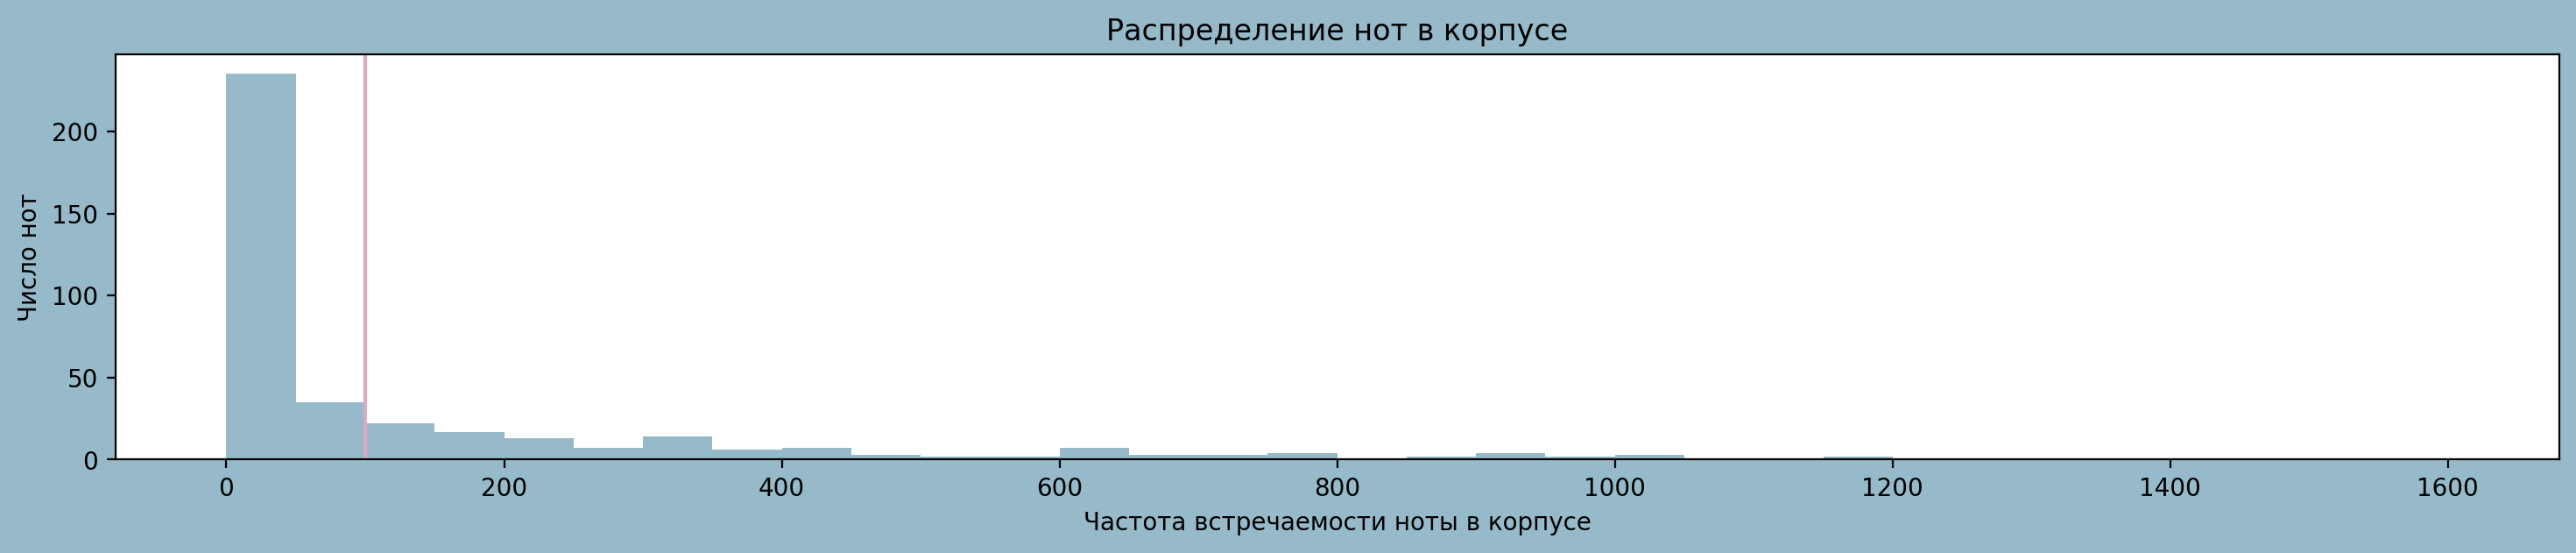

In [28]:
plt.figure(figsize=(18, 3), facecolor='#97BACB')
bins = np.arange(0,(max(Recurrence)), 50)
plt.hist(Recurrence, bins=bins, color='#97BACB')
plt.axvline(x=100, color='#DBACC1') # отсечка по встречаемости в 100 раз
plt.title('Распределение нот в корпусе')
plt.xlabel('Частота встречаемости ноты в корпусе')
plt.ylabel('Число нот')
plt.show()

Будем избавляться от нот, которые встретились менее 100 раз.

In [29]:
# Получение списка редких нот
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)

print("Общее число нот, которые повторяются менее 100 раз:", len(rare_note))

Общее число нот, которые повторяются менее 100 раз: 270


**Удаление редких нот**

In [30]:
for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Длина корпуса после исключения редких нот:", len(Corpus))

Длина корпуса после исключения редких нот: 53745


## Предобработка данных

Ноты - это, по сути, звуковые волны. В музыке у нас есть определенные комбинации частот и длин волн, стандартизированные как указанные ноты. То есть библиотека `music21` помогает нам преобразовывать в последовательность звуковых нот, наши текстовые имена нот или аккорды (ноты записанные вместе через разделитель - "точку"). Либо, наоборот, извлеченные звуки midi-файлов в текстовые нотации. Также библиотека позволяет извлекать частоту, длину волны, длительность и т.д. для данных нот.


### Создание словаря

Нам необходимо создать словарь для сопоставления нот и их индексов. У нас есть название ноты в виде строки. Для компьютера эти имена являются просто символом. Таким образом, мы создаем словарь, чтобы сопоставить каждую уникальную ноту в нашем корпусе с цифрой. И наоборот, для получения значений во время прогнозирования. Это будет использоваться для кодирования и декодирования информации, поступающей в модель и выходящей из нее. Фактически мы проводим процедуру, которую принято называть мэпингом (mapping) данных.

In [36]:
# Сохраняем все уникальные значения корпуса
symb = sorted(list(set(Corpus)))
print(symb)

L_corpus = len(Corpus) # длина корпуса
L_symb = len(symb) # число уникальных элементов корпуса

# Создание словаря для доступа к словарному запасу из индексов и наоборот
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Общее число символов:", L_corpus)
print("Число уникальных символов:", L_symb)

['0', '0.1', '0.1.3', '0.1.3.5', '0.1.3.7', '0.2', '0.2.4', '0.2.5', '0.2.6', '0.2.6.8', '0.2.7', '0.3', '0.3.5', '0.3.6', '0.3.6.8', '0.3.6.9', '0.3.7', '0.4', '0.4.5', '0.4.6', '0.4.7', '0.4.8', '0.5', '0.5.6', '0.6', '1', '1.2', '1.2.3', '1.2.4.5', '1.2.4.8', '1.3', '1.3.4', '1.3.5', '1.3.5.6', '1.3.5.9', '1.3.6', '1.3.7', '1.3.8', '1.4', '1.4.5', '1.4.6', '1.4.7', '1.4.7.10', '1.4.7.9', '1.4.8', '1.5', '1.5.6', '1.5.7', '1.5.8', '1.5.9', '1.6', '1.7', '10', '10.0', '10.0.1', '10.0.1.3', '10.0.2', '10.0.3', '10.0.3.6', '10.0.4', '10.0.5', '10.1', '10.1.2', '10.1.3', '10.1.3.6', '10.1.4', '10.1.4.6', '10.1.5', '10.11', '10.11.0', '10.11.1', '10.11.1.2', '10.11.2', '10.11.4', '10.2', '10.2.3', '10.2.5', '10.3', '10.3.4', '11', '11.0', '11.0.2', '11.0.2.3', '11.0.2.4', '11.0.2.6', '11.0.3', '11.0.4', '11.0.5', '11.1', '11.1.2.4', '11.1.3.5', '11.1.4', '11.1.4.6', '11.1.5', '11.1.6', '11.2', '11.2.4', '11.2.5', '11.2.5.7', '11.2.6', '11.3', '11.3.4', '11.3.5', '11.3.6', '11.4', '2', '2.

### Кодирование и разбиение корпуса

Далее нам необходимо выполнить кодирование и разбиение корпуса на более мелкие последовательности одинаковой длины.

Мы закодируем корпус и создадим небольшие входные объекты - последовательности нот одинаковой длины и соответствующие им целевые выходные последовательности нот. Каждый объект и цель будут содержать сопоставленный индекс в словаре уникальных символов, которые они обозначают. Задача, которую мы ставим нашей модели - по входной последовательности нот предсказать продолжение мелодии.

In [37]:
# Разбиение корпуса на равные входные строки и выходные целевые последовательности

# длинны последовательностей
length = 40

# входные последовательности
features = []

# целевые последовательности
targets = []

# цикл разбиения корпуса
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)
print("Общее количество последовательностей в корпусе:", L_datapoints)

Общее количество последовательностей в корпусе: 57854


### Нормализация данных

Прежде чем создать выборки для обучения и тестирования модели, нам необходимо изменить размер входных данных (reshape) и нормализовать (normalize) их. Для целевых выходных данных мы проведем процедуру категоризации или как мы ее называли ранее one-hot encode (мы намеренно по-разному называем и пишем однотипные понятия, чтобы вы знали варианты, которые встречаются в книгах или научных публикациях).

In [38]:
# изменение размера и нормализация входных данных
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one-hot encode для целевых выходных данных
y = tensorflow.keras.utils.to_categorical(targets)

In [39]:
print(f'Форма входных данных: {X.shape}')
print(f'Форма выходных данных: {y.shape}')

Форма входных данных: (57854, 40, 1)
Форма выходных данных: (57854, 397)


In [43]:
class MusicDataPreprocessor:
    def __init__(self, rare_note_threshold=5, sequence_length=100):
        self.rare_note_threshold = rare_note_threshold
        self.sequence_length = sequence_length
        self.mapping = None
        self.reverse_mapping = None

    def remove_rare_notes(self, corpus):
        """Remove notes that appear less than the threshold times."""
        count_num = Counter(corpus)
        rare_notes = [note for note, count in count_num.items()
                     if count < self.rare_note_threshold]

        return [note for note in corpus if note not in rare_notes]

    def create_mappings(self, symbols):
        """Create forward and reverse mappings for symbols."""
        self.mapping = dict((c, i) for i, c in enumerate(symbols))
        self.reverse_mapping = dict((i, c) for i, c in enumerate(symbols))

    def create_sequences(self, corpus, num_symbols):
        """Create input sequences and corresponding targets."""
        features = []
        targets = []

        for i in range(0, len(corpus) - self.sequence_length):
            feature = corpus[i:i + self.sequence_length]
            target = corpus[i + self.sequence_length]
            features.append([self.mapping[j] for j in feature])
            targets.append(self.mapping[target])

        X = (np.reshape(features, (-1, self.sequence_length, 1))) / float(num_symbols)
        y = tensorflow.keras.utils.to_categorical(targets)

        return X, y

    def process_data(self, corpus):
        """Main processing pipeline."""
        # Remove rare notes
        processed_corpus = self.remove_rare_notes(corpus)

        # Get unique symbols
        symbols = sorted(list(set(processed_corpus)))

        # Create mappings
        self.create_mappings(symbols)

        # Print statistics
        print(f"Total number of symbols: {len(processed_corpus)}")
        print(f"Number of unique symbols: {len(symbols)}")

        # Create sequences
        return self.create_sequences(processed_corpus, len(symbols))

In [50]:
preprocessor = MusicDataPreprocessor(rare_note_threshold=5)
X, y = preprocessor.process_data(Corpus)

Total number of symbols: 57648
Number of unique symbols: 269


In [51]:
X2, y2 = preprocessor.process_data(Corpus_starters)

Total number of symbols: 55719
Number of unique symbols: 191


In [49]:
print(f'Форма входных данных: {X.shape}')
print(f'Форма выходных данных: {y.shape}')

Форма входных данных: (55619, 100, 1)
Форма выходных данных: (55619, 191)


### Разделение выборки

Нам необходимо разделить наши наборы данных на тренировочные и начальные данные.

Возможно у вас уже возник вопрос: "Что еще за начальные данные?"

Все просто. Выше мы говорили, что учим нашу модель предсказывать продолжение мелодий по их начальным нотам. То есть нам нужны данные, которые запустят механизм генерации мелодии. Для этого мы и делим выборку на тренировочную и начальную. С помощью `random_state` мы задали начальные состояния для разбиения выборки, тем самым обеспечили воспроизводимость результатов. Чтобы после каждого запуска колаба результаты были похожие.

In [40]:
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

## Архитектура сети

In [41]:
model = Sequential()

model.add(LSTM(256, input_shape=X.shape[1:], return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(128))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 397)                 │          51,213 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,037 (2.02 MB)

 Trainable params: 529,037 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(X_train, y_train, batch_size=256, epochs=150)

Epoch 1/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - acc: 0.0212 - loss: 5.1559
Epoch 2/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.0249 - loss: 4.9296
Epoch 3/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.0286 - loss: 4.7974
Epoch 4/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.0330 - loss: 4.6889
Epoch 5/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.0360 - loss: 4.6749
Epoch 6/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.0353 - loss: 4.6556
Epoch 7/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - acc: 0.0361 - loss: 4.6485
Epoch 8/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.0367 - loss: 4.6331
Epoch 9/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.0354 - loss: 4.6360
Epoch 10/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - acc: 0.0391 - loss: 4.6128
Epoch 11/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.0380 - loss: 4.6055
Epoch 12/150
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.0364 - loss: 4.6020
E

## Оценка результатов обучения

In [1]:
plt.plot(history.epoch, history.history['acc'], 'r', label='Точность на обучающей выборке')
plt.title('График точности на обучающей выборке')
plt.legend()
plt.figure()
plt.plot(history.epoch, history.history['loss'], 'b', label='Потери на обучающей выборке')
plt.title('График потерь на обучающей выборке')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Как видно по графикам точности и графику потерь, что переобучение не происходит, у графика точности есть потенциал к росту, т.к. он еще далек от насыщения. Можно продолжать обучение. Однако, когда речь идет о генерации новых произведений, то нам и не нужна слишком большая точность. Наша задача сгенерировать, а не добиться полного повторения мелодии. Поэтому в зависимости от поставлленной цели и решаемых задач, мы принимаем решение до какой точности мы обучаем нашу модель.

## Генерация музыкального произведения

Создадим функцию, которая выбирает из начальной выборки случайную последовательность, "скармливает" ее модели, получает предсказанную последовательность и по ней "восстанавливает" ноты.

In [ ]:
def music_generator(seq_len):
    # случайный выбор начальной последовательности
    seed = X_seed[np.random.randint(0, len(X_seed)-1)]
    music = []
    notes = []
    for i in range(seq_len):
        # изменяем размер данных для передачи модели
        seed = seed.reshape(1, length, 1)

        # предсказываем по начальной последовательности
        prediction = model.predict(seed, verbose=0)[0]

        # предсказанные значения прогоняем через функцию softmax
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)

        # выбираем индекс наиболее вероятного класса
        index = np.argmax(prediction)

        # нормализованный индекс в интервале [0, 1]
        # значение пойдет в seed, а там все значения в интервале [0, 1]
        index_N = index / float(L_symb)

        # складываем в список индекс предсказанной ноты
        notes.append(index)

        # обратное преобразование по словарю, на выходе последовательность нот
        music = [reverse_mapping[char] for char in notes]

        # seed всегда длины length
        # добавляем справа новое значение, а слева удаляем и уходим на новую итерацию цикла
        seed = np.insert(seed[0], len(seed[0]), index_N)
        seed = seed[1:]

    return chords_n_notes(music)


Забыли как выглядит функция для softmax? Вспоминаем в псевдокоде:
```python
softmax(x) = np.exp(x)/sum(np.exp(x))

```

Сгенерируем из входной последовательности длиной 100 музыку:

In [ ]:
genMusic = music_generator(100)
genMidi = stream.Stream(genMusic)

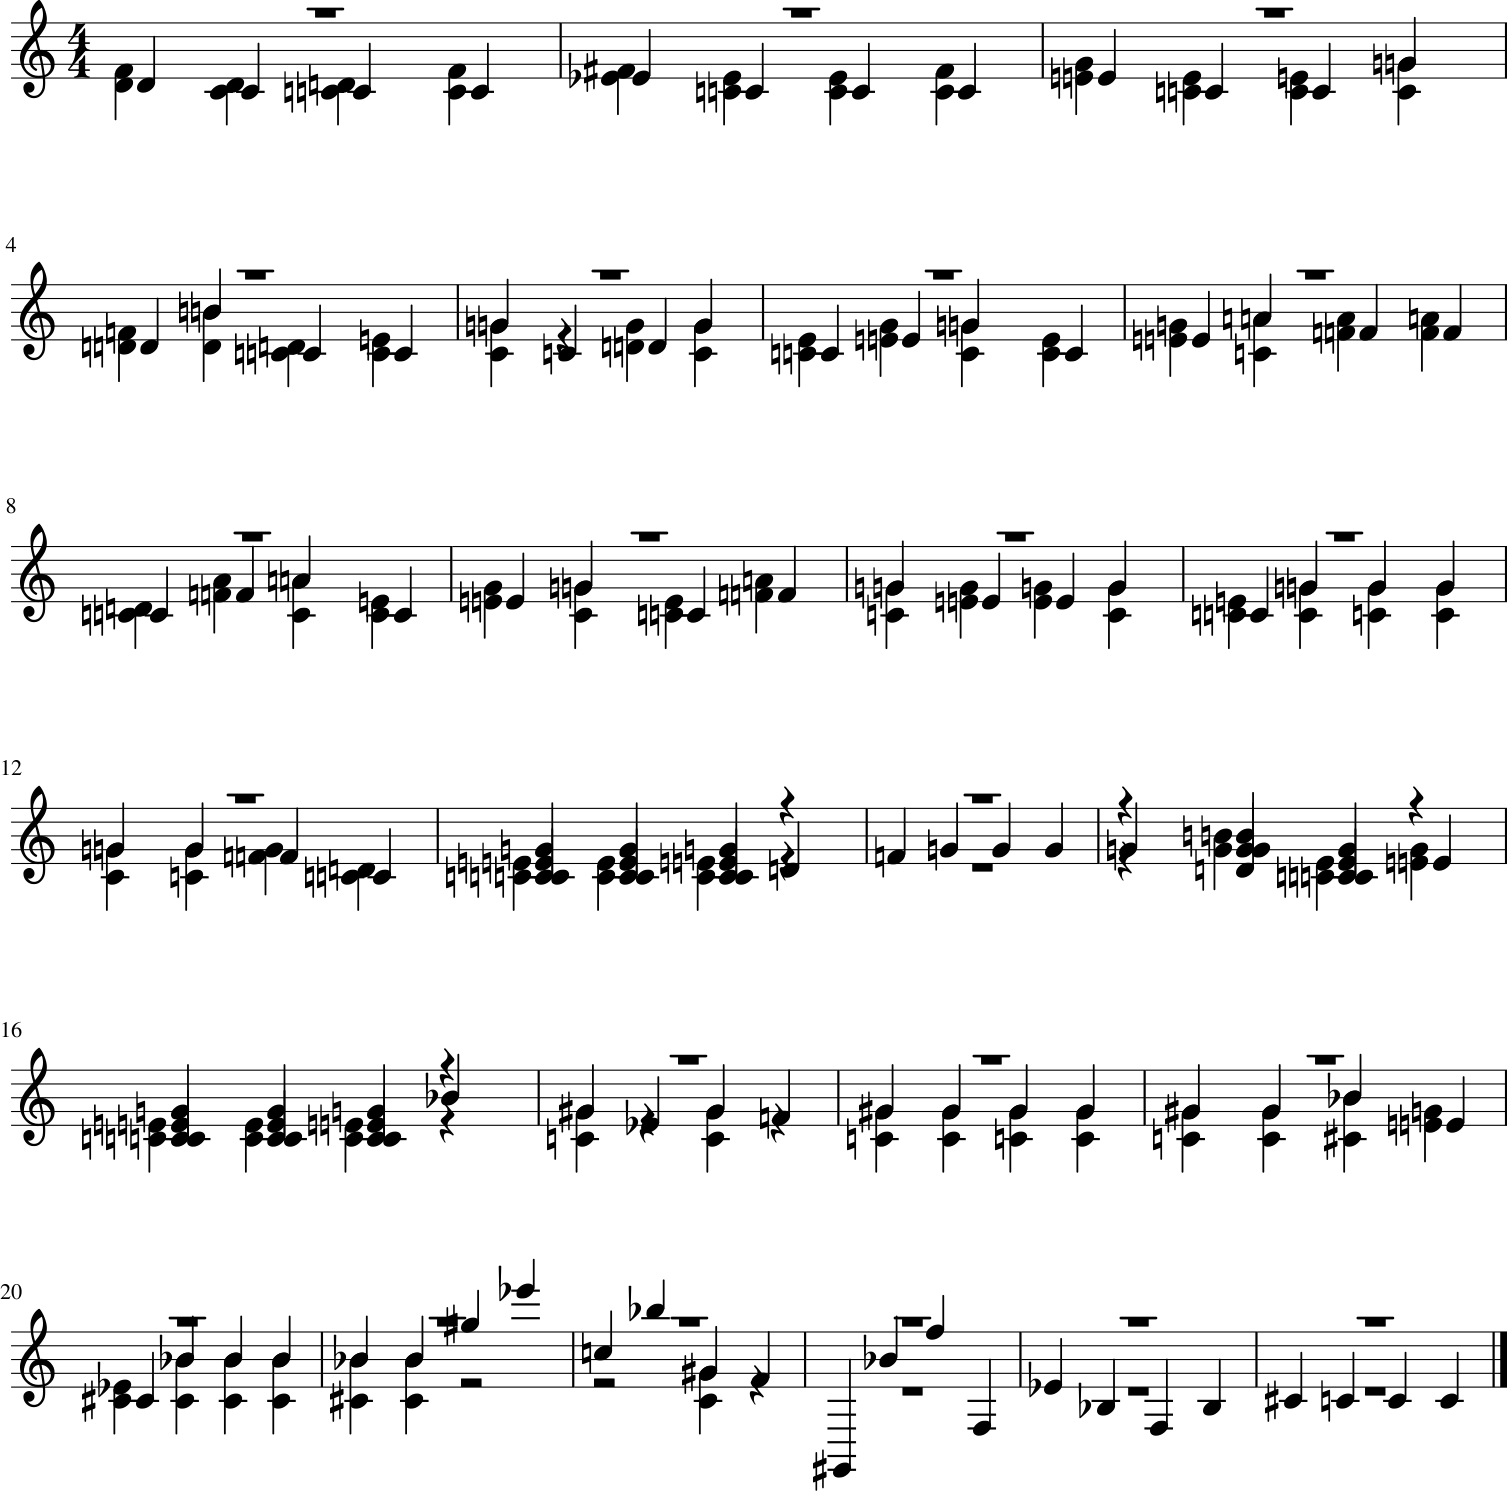

In [ ]:
# Отобразим нотный стан
genMidi.show()

In [ ]:
# Выведем в виде звуковой дорожки
genMidi.show('midi')

Таким образом, мы получили очень простым способом, что-то удаленно напоминающее музыку. Как же можно улучшить результат?

Сначала необходимо проанализировать, какую информацию нам дает MIDI-файл. А он нам дает для каждой ноты ее имя (например, `А`), ее октаву (цифра после обозначения ноты, например, `А4`), начало воспроизведение ноты (`start`) и время окончания воспроизведения ноты (`end`). Чтобы получить доступ к атрибутам `start` и `end` можно использовать функцию ниже.

In [ ]:
# установим библиотеку для извлечения данных из MIDI
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=dbb23ead1f9964545d9ea0ceb84c65ef6802180feca659fa35c0803786169ec5
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
# импортируем необходимые библиотеки

# для работы с матрицами
import numpy as np

# для работы с датафреймами
import pandas as pd

# импортируем загруженную библиотеку для работы с MIDI
import pretty_midi

In [ ]:
# функция преобразования MIDI в DataFrame, содержащий ноты и их расширенные параметры
def midi_to_notes(midi_file: str):
  # чтение MIDI
  pm = pretty_midi.PrettyMIDI(midi_file)
  # извлечение первого инструмента
  instrument = pm.instruments[0]

  # объявляем список для хранения нот
  notes = []
  # сортируем ноты по времени начала ноты
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)

  # переменная для расчета шага, хранит предущее значение start
  prev_start = sorted_notes[0].start # начало первой ноты

  for note in sorted_notes:
    # начало ноты
    start = note.start
    # конец ноты
    end = note.end
    notes.append(
        dict(
            pitch=note.pitch,             # имя ноты
            start=note.start,             # начало ноты
            end=note.end,                 # конец ноты
            step=(start - prev_start),    # шаг
            duration=(end - start)        # длительность ноты
        )
    )

    prev_start = start # запоминаем значение предыдущего старта

  return pd.DataFrame(notes) # функция возвращает значение DataFrame библиотеки pandas

In [ ]:
# Выбор произвольного MIDI файла
filepath = f"./dataset/Bach/bach_846.mid"

# Преобразуем в ноты с расширенными параметрами
raw_notes = midi_to_notes(filepath)

# Вывод первых 5 строк
raw_notes.head()

,pitch,start,end,step,duration
0,67,0.407095,0.609797,0.000000,0.202703
1,72,0.609797,0.812467,0.202703,0.202669
2,76,0.812467,0.991275,0.202669,0.178808
3,67,1.011176,1.213878,0.198709,0.202703
4,72,1.213878,1.416581,0.202703,0.202703


И тогда при обучении модели необходимо будет использовать три переменные для представления ноты: `pitch`, `step` и `duration`. Высота звука (pitch) - это качество восприятия звука в виде номера ноты в формате MIDI. Шаг (step) - это время, прошедшее с предыдущей ноты или начала трека. Длительность (duration) - это продолжительность воспроизведения ноты в секундах и разница между временем окончания и началом ноты.

Библиотека `music21` довольно мощная и дает нам все необходимые инструменты для получения первоклассной модели по генерации музыки. Однако, чтобы воспользоваться ей на все 100% необходимо иметь, как минимум базовое музыкальное образование. Так как простой последовательности нот недостаточно, чтобы "творить шедевры".

А теперь пора перейти к [домашней работе](https://colab.research.google.com/drive/1uZ-sCic9BV5quOohckycIqhYkl8MvvvV), где попробовать улучшить модель для генерации музыкальных произведений.